In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
wd = 'D:/Pesquisa/Banco de Dados GIS/Paisagem terrestre'
wd2= 'D:/Pesquisa/Mestrado/ShapeFiles/'
paises = gpd.read_file(wd+str('/paises.shp'))
mero_america = gpd.read_file(wd2+str('mero_AmericanSet.shp'))
mero_africa = gpd.read_file(wd2+'mero_FullSet.shp')
eoo = gpd.read_file(wd2+('/EOO Mero/data_0.shp'))

Text(0.98, 0.01999999999999999, 'N')

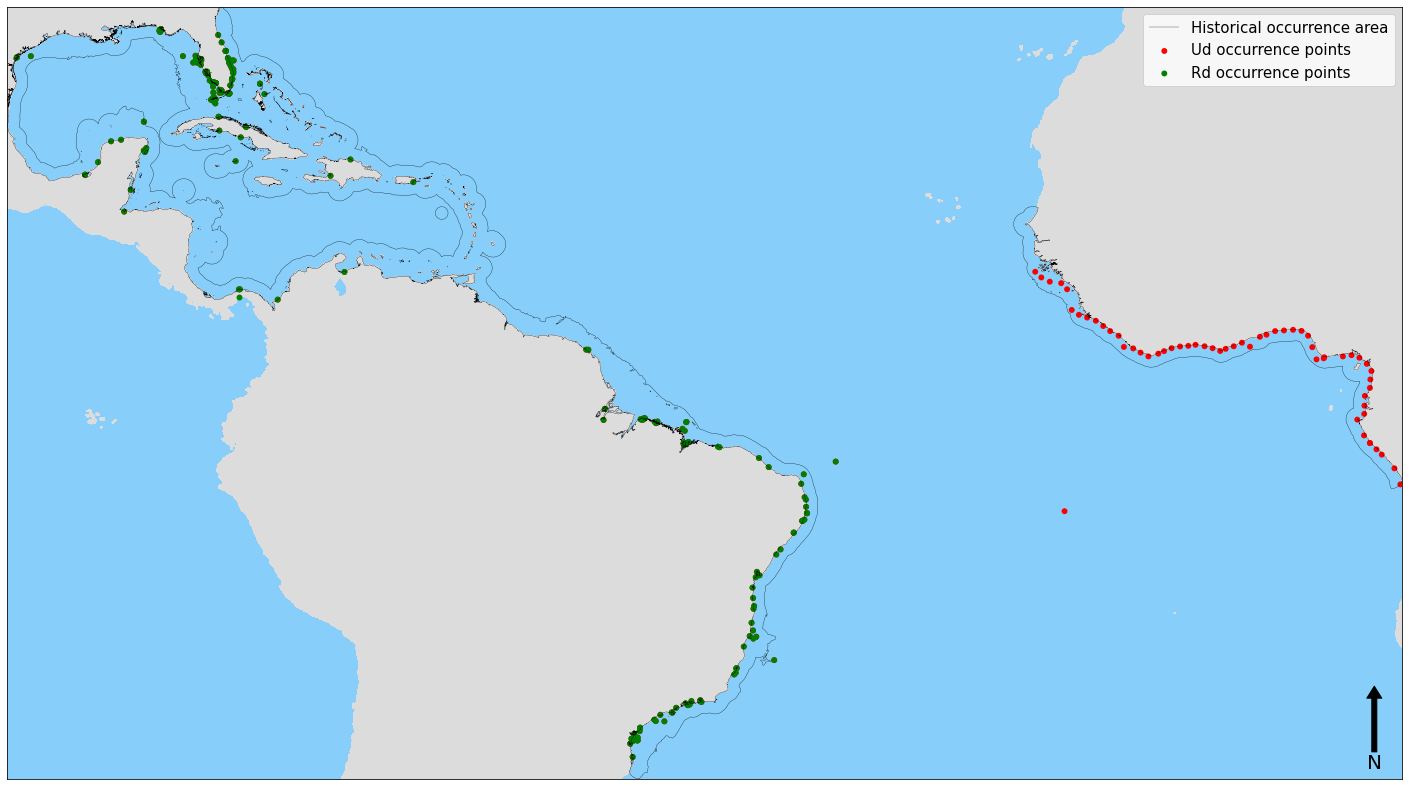

In [2]:
fig,ax1 = plt.subplots(ncols=1,figsize = (25,20))
xlim = ([eoo.total_bounds[0],  eoo.total_bounds[2]])
ylim = ([eoo.total_bounds[1],  eoo.total_bounds[3]])
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
paises.plot(ax=ax1,color = 'gainsboro',antialiased=False,edgecolor = 'none')
eoo.boundary.plot(ax=ax1,edgecolor = 'black',linewidth = 0.3,label = 'Historical occurrence area')
mero_africa.plot(ax=ax1,color = 'red',edgecolor = 'none',markersize=35,label = 'Ud occurrence points',legend = True)
mero_america.plot(ax=ax1,color = 'green',edgecolor = 'none',markersize=35,label = 'Rd occurrence points',legend = True)

ax1.set_facecolor('lightskyblue')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)
ax1.legend(bbox_to_anchor=(1, 1),fontsize=15)
ax1.tick_params(axis = 'both',which='both',labelbottom = False,bottom=False,labelleft = False,left=False)

x, y, arrow_length = 0.98, 0.12, 0.1
ax1.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax1.transAxes)



In [4]:
import rasterio
import numpy as np
from osgeo import gdal
import seaborn as sns
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from descartes import PolygonPatch
import fiona
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import rioxarray as rxr
import earthpy as et
import earthpy.plot as ep
from matplotlib import gridspec
modelo_fullset = rasterio.open('D:/Pesquisa/Mestrado/PRIMEIRO_CAPITULO_DIFERENCIADO/Modelos_de_Nicho/Total_testDep\Fixed/FullSet0.5Continuo_EOO.img')

In [4]:
modelo_fullset.bounds

BoundingBox(left=-10903234.208534146, bottom=-3328409.130826525, right=1371063.2553271465, top=3677249.3121904754)

In [5]:
modelo_fullset.transform

Affine(9596.79238769452, 0.0, -10903234.208534146,
       0.0, -9596.79238769452, 3677249.3121904754)

In [6]:
modelo_fullset.crs

CRS.from_wkt('PROJCS["WGS_1984_Miller_Cylindrical",GEOGCS["WGS 84",DATUM["D_unknown",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Miller_Cylindrical"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [7]:
modelo_fullset.indexes

(1,)

<AxesSubplot:>

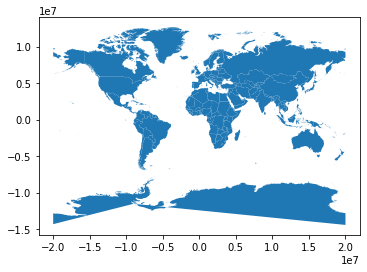

In [5]:
coordenada = 'PROJCS["WGS_1984_Miller_Cylindrical",GEOGCS["WGS 84",DATUM["D_unknown",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Miller_Cylindrical"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'
paises2 = paises.to_crs(coordenada)
paises2.plot()

In [9]:
paises2.crs

<Projected CRS: PROJCS["WGS_1984_Miller_Cylindrical",GEOGCS["WGS 8 ...>
Name: WGS_1984_Miller_Cylindrical
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Miller Cylindrical
Datum: D_unknown
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

D:\Anaconda\lib\site-packages\matplotlib\image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


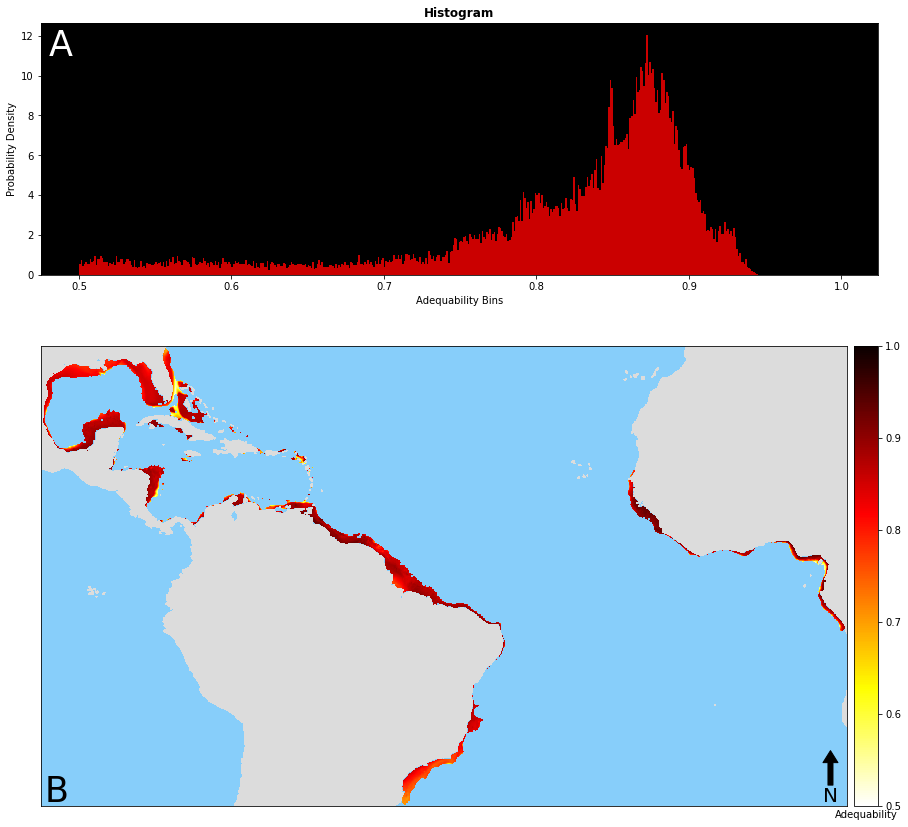

In [49]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,15),
                       gridspec_kw={
                           'width_ratios': [12],
                           'height_ratios': [12,25],'hspace': 0.1})


# ax[1] will take 0th position in
# geometry(Grid we created for subplots)

aspect = 20
pad_fraction = 0.5

xlim = ([eoo.total_bounds[0],  eoo.total_bounds[2]])
ylim = ([eoo.total_bounds[1],  eoo.total_bounds[3]])
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
paises2.plot(ax = ax[1],color = 'gainsboro',antialiased=False,edgecolor = 'none')

# use imshow so that we have something to map the colorbar to
image_hidden = ax[1].imshow(modelo_fullset.read(1,masked = True), 
                         cmap='hot_r', 
                         vmin=0.5, 
                         vmax=1)

# plot on the same axis with rio.plot.show
image = show(modelo_fullset, 
                      transform=modelo_fullset.transform, 
                      ax=ax[1], 
                      cmap='hot_r', 
                      vmin=0.5, 
                      vmax=1)

# add colorbar using the now hidden image

divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="3%", pad=0.10)
cax.set_xlabel('Adequability')
plt.colorbar(image_hidden, cax=cax)
ax[1].set_facecolor('lightskyblue')
ax[1].tick_params(axis = 'both',which='both',labelbottom = False,bottom=False,labelleft = False,left=False)
x, y, arrow_length = 0.98, 0.12, 0.1
ax[1].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax[1].transAxes)
w, z, letra = 0.02, 0.13, 0.1
ax[1].annotate('B', xy=(w, z), xytext=(w, z-letra),
            
            ha='center', va='center', fontsize=35,
            xycoords=ax[1].transAxes)





#AX0
show_hist(modelo_fullset,ax=ax[0], bins=np.arange(0.5,1,0.001), stacked=False, alpha=0.8,log=False,cumulative= False,density= True)
ax[0].get_legend().remove()
ax[0].grid(False)
ax[0].set_facecolor('black')
ax[0].set( ylabel='Probability Density',xlabel = 'Adequability Bins')


ax[0].text(0.48, 11,'A', fontsize = 35,color = 'white')


plt.show()

In [50]:
import rasterio
import numpy as np
from osgeo import gdal
import seaborn as sns
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from descartes import PolygonPatch
import fiona
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import rioxarray as rxr
import earthpy as et
import earthpy.plot as ep
from matplotlib import gridspec
RdUd=rasterio.open('D:\Pesquisa\Mestrado\PRIMEIRO_CAPITULO_DIFERENCIADO\Modelos_de_Nicho\Teste_Independente Africa\Fixed Value\IndepAfrica_0.5Continuo_EOO.img')

D:\Anaconda\lib\site-packages\matplotlib\image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


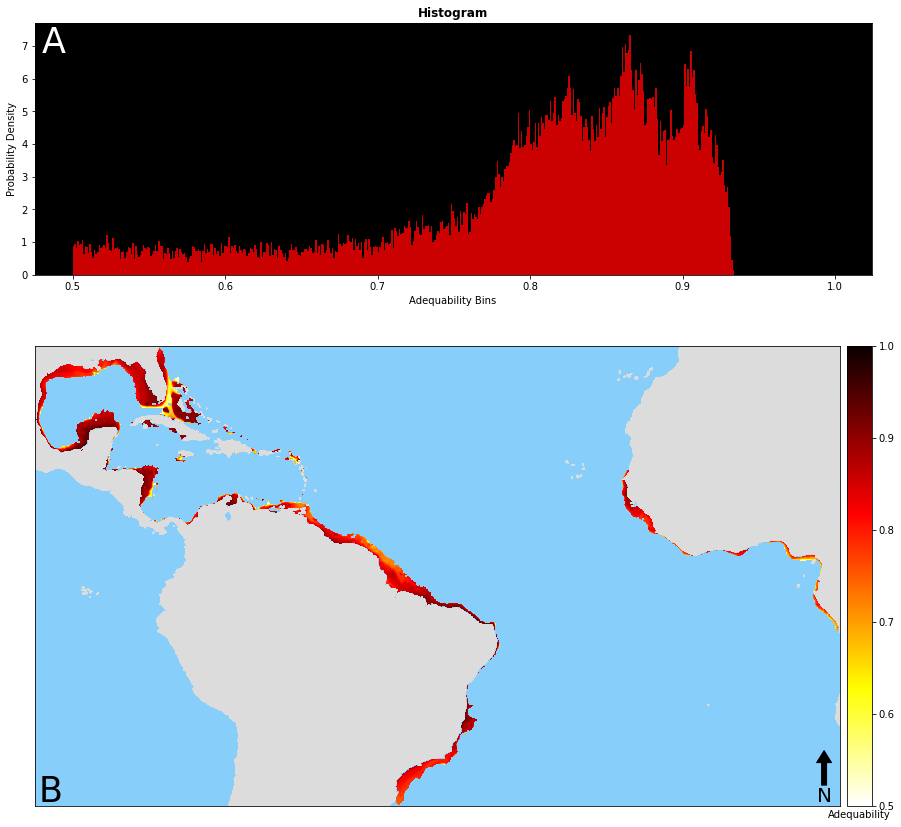

In [57]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,15),
                       gridspec_kw={
                           'width_ratios': [12],
                           'height_ratios': [12,25],'hspace': 0.1})


# ax[1] will take 0th position in
# geometry(Grid we created for subplots)

aspect = 20
pad_fraction = 0.5

xlim = ([eoo.total_bounds[0],  eoo.total_bounds[2]])
ylim = ([eoo.total_bounds[1],  eoo.total_bounds[3]])
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
paises2.plot(ax = ax[1],color = 'gainsboro',antialiased=False,edgecolor = 'none')

# use imshow so that we have something to map the colorbar to
image_hidden = ax[1].imshow(RdUd.read(1,masked = True), 
                         cmap='hot_r', 
                         vmin=0.5, 
                         vmax=1)

# plot on the same axis with rio.plot.show
image = show(RdUd, 
                      transform=RdUd.transform, 
                      ax=ax[1], 
                      cmap='hot_r', 
                      vmin=0.5, 
                      vmax=1)

# add colorbar using the now hidden image

divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="3%", pad=0.10)
cax.set_xlabel('Adequability')
plt.colorbar(image_hidden, cax=cax)
ax[1].set_facecolor('lightskyblue')
ax[1].tick_params(axis = 'both',which='both',labelbottom = False,bottom=False,labelleft = False,left=False)
x, y, arrow_length = 0.98, 0.12, 0.1
ax[1].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax[1].transAxes)



#AX0
show_hist(RdUd,ax=ax[0], bins=np.arange(0.5,1,0.001), stacked=False, alpha=0.8,log=False,cumulative= False,density= True)
ax[0].get_legend().remove()
ax[0].grid(False)
ax[0].set_facecolor('black')
ax[0].set( ylabel='Probability Density',xlabel = 'Adequability Bins')

w, z, letra = 0.02, 0.13, 0.1
ax[1].annotate('B', xy=(w, z), xytext=(w, z-letra),
            
            ha='center', va='center', fontsize=35,
            xycoords=ax[1].transAxes)


ax[0].text(0.48, 6.8,'A', fontsize = 35,color = 'white')
plt.show()

D:\Anaconda\lib\site-packages\matplotlib\image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


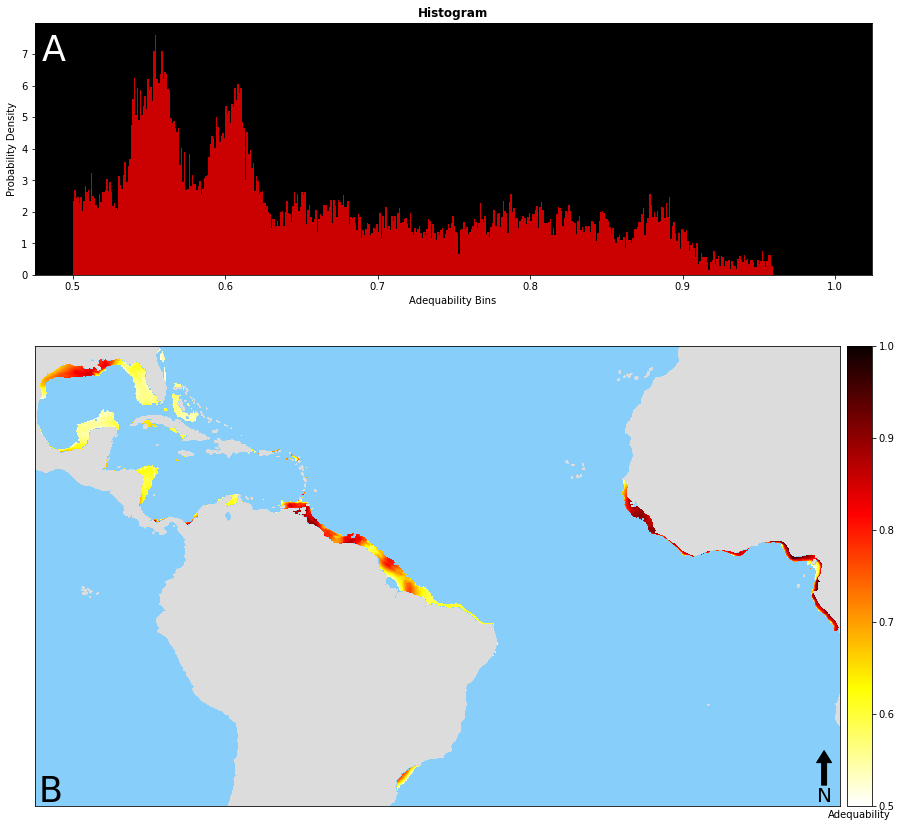

In [58]:
UdRd = rasterio.open('D:\Pesquisa\Mestrado\PRIMEIRO_CAPITULO_DIFERENCIADO\Modelos_de_Nicho\Teste_Independente_America\Fixed Value\IndepAmerica_0.5Continuo_EOO.img')
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,15),
                       gridspec_kw={
                           'width_ratios': [12],
                           'height_ratios': [12,25],'hspace': 0.1})


# ax[1] will take 0th position in
# geometry(Grid we created for subplots)

aspect = 20
pad_fraction = 0.5

xlim = ([eoo.total_bounds[0],  eoo.total_bounds[2]])
ylim = ([eoo.total_bounds[1],  eoo.total_bounds[3]])
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
paises2.plot(ax = ax[1],color = 'gainsboro',antialiased=False,edgecolor = 'none')

# use imshow so that we have something to map the colorbar to
image_hidden = ax[1].imshow(UdRd.read(1,masked = True), 
                         cmap='hot_r', 
                         vmin=0.5, 
                         vmax=1)

# plot on the same axis with rio.plot.show
image = show(UdRd, 
                      transform=UdRd.transform, 
                      ax=ax[1], 
                      cmap='hot_r', 
                      vmin=0.5, 
                      vmax=1)

# add colorbar using the now hidden image

divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="3%", pad=0.10)
cax.set_xlabel('Adequability')
plt.colorbar(image_hidden, cax=cax)
ax[1].set_facecolor('lightskyblue')
ax[1].tick_params(axis = 'both',which='both',labelbottom = False,bottom=False,labelleft = False,left=False)
x, y, arrow_length = 0.98, 0.12, 0.1
ax[1].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax[1].transAxes)



#AX0
show_hist(UdRd,ax=ax[0], bins=np.arange(0.5,1,0.001), stacked=False, alpha=0.8,log=False,cumulative= False,density= True)
ax[0].get_legend().remove()
ax[0].grid(False)
ax[0].set_facecolor('black')
ax[0].set( ylabel='Probability Density',xlabel = 'Adequability Bins')



ax[0].text(0.48, 6.8,'A', fontsize = 35,color = 'white')
w, z, letra = 0.02, 0.13, 0.1
ax[1].annotate('B', xy=(w, z), xytext=(w, z-letra),
            
            ha='center', va='center', fontsize=35,
            xycoords=ax[1].transAxes)

plt.show()

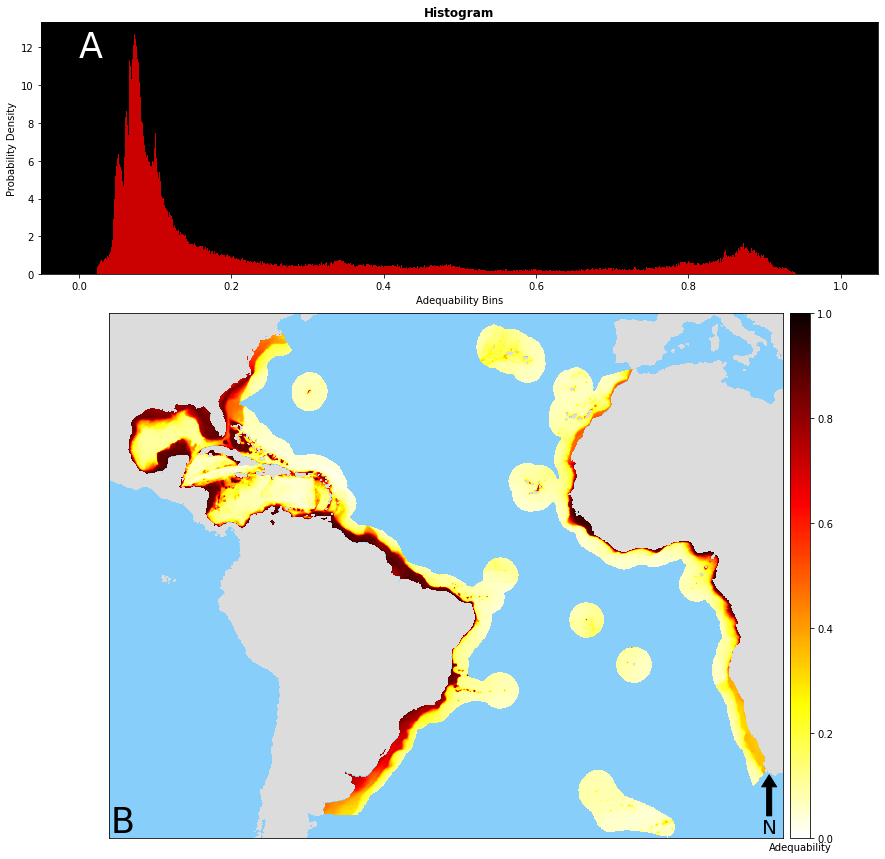

In [28]:
wd='D:/Pesquisa/Banco de Dados GIS/ECOREGIOES MARINHAS/MEOW_FINAL/MEOW/'
Ecoreg=gpd.read_file(wd+str('meow_ecos_miller_atlantic.shp'))

FullSet_Ensemble=rasterio.open('D:/Pesquisa/Mestrado/PRIMEIRO_CAPITULO_DIFERENCIADO/Modelos_de_Nicho/Total_testDep/PELOTSS/ensemble_sdm_total_PELOTSS.img')
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,15),
                       gridspec_kw={
                           'width_ratios': [12],
                           'height_ratios': [12,25],'hspace': 0.1})
aspect = 20
pad_fraction = 0.5

xlim = ([Ecoreg.total_bounds[0],  Ecoreg.total_bounds[2]])
ylim = ([Ecoreg.total_bounds[1],  Ecoreg.total_bounds[3]])
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
paises2.plot(ax = ax[1],color = 'gainsboro',antialiased=False,edgecolor = 'none')

# use imshow so that we have something to map the colorbar to
image_hidden = ax[1].imshow(FullSet_Ensemble.read(1,masked = True), 
                         cmap='hot_r', 
                         vmin=0.0, 
                         vmax=1)

# plot on the same axis with rio.plot.show
image = show(FullSet_Ensemble, 
                      transform=FullSet_Ensemble.transform, 
                      ax=ax[1], 
                      cmap='hot_r', 
                      vmin=0.0, 
                      vmax=1)

# add colorbar using the now hidden image

divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="3%", pad=0.10)
cax.set_xlabel('Adequability')
plt.colorbar(image_hidden, cax=cax)
ax[1].set_facecolor('lightskyblue')
ax[1].tick_params(axis = 'both',which='both',labelbottom = False,bottom=False,labelleft = False,left=False)
x, y, arrow_length = 0.98, 0.12, 0.1
ax[1].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax[1].transAxes)

#AX0
show_hist(FullSet_Ensemble,ax=ax[0], bins=np.arange(0.0,1,0.001), stacked=False, alpha=0.8,log=False,cumulative= False,density= True)
ax[0].get_legend().remove()
ax[0].grid(False)
ax[0].set_facecolor('black')
ax[0].set( ylabel='Probability Density',xlabel = 'Adequability Bins')



ax[0].text(0.0, 11.5,'A', fontsize = 35,color = 'white')
w, z, letra = 0.02, 0.13, 0.1
ax[1].annotate('B', xy=(w, z), xytext=(w, z-letra),
            
            ha='center', va='center', fontsize=35,
            xycoords=ax[1].transAxes)

plt.show()

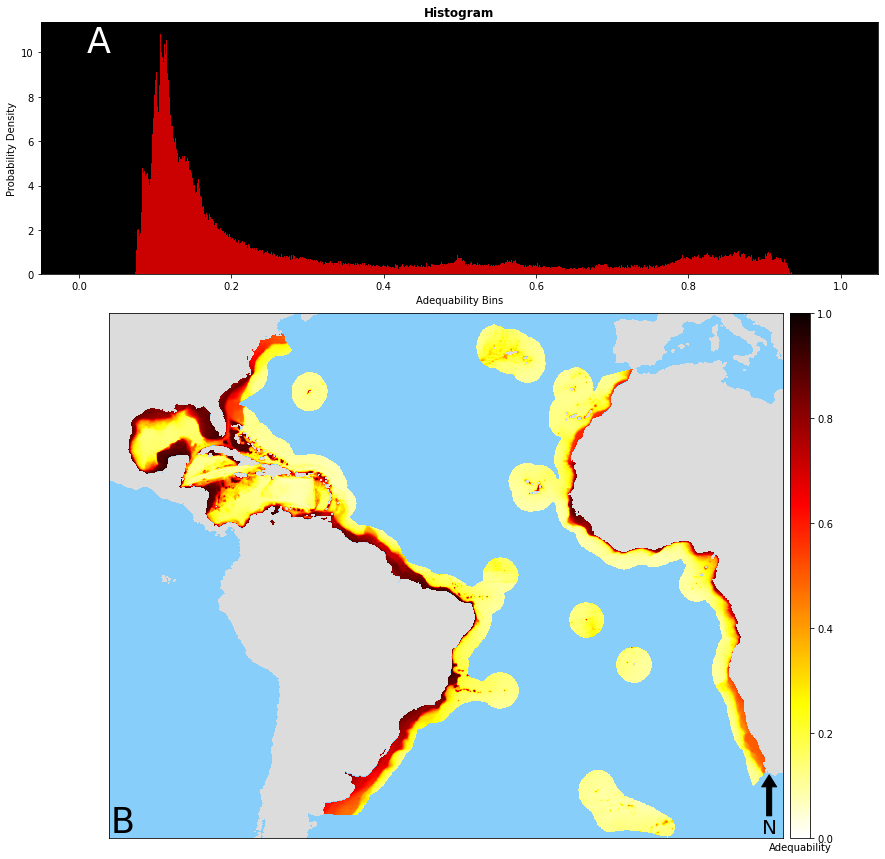

In [32]:
RdUd_Ensemble=rasterio.open('D:\Pesquisa\Mestrado\PRIMEIRO_CAPITULO_DIFERENCIADO\Modelos_de_Nicho\Teste_Independente Africa\PELOTSS\ensemble_sdm_america_IndepAfrica_PELOTSS.img')
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,15),
                       gridspec_kw={
                           'width_ratios': [12],
                           'height_ratios': [12,25],'hspace': 0.1})
aspect = 20
pad_fraction = 0.5

xlim = ([Ecoreg.total_bounds[0],  Ecoreg.total_bounds[2]])
ylim = ([Ecoreg.total_bounds[1],  Ecoreg.total_bounds[3]])
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
paises2.plot(ax = ax[1],color = 'gainsboro',antialiased=False,edgecolor = 'none')

# use imshow so that we have something to map the colorbar to
image_hidden = ax[1].imshow(RdUd_Ensemble.read(1,masked = True), 
                         cmap='hot_r', 
                         vmin=0.0, 
                         vmax=1)

# plot on the same axis with rio.plot.show
image = show(RdUd_Ensemble, 
                      transform=RdUd_Ensemble.transform, 
                      ax=ax[1], 
                      cmap='hot_r', 
                      vmin=0.0, 
                      vmax=1)

# add colorbar using the now hidden image

divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="3%", pad=0.10)
cax.set_xlabel('Adequability')
plt.colorbar(image_hidden, cax=cax)
ax[1].set_facecolor('lightskyblue')
ax[1].tick_params(axis = 'both',which='both',labelbottom = False,bottom=False,labelleft = False,left=False)
x, y, arrow_length = 0.98, 0.12, 0.1
ax[1].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax[1].transAxes)

#AX0
show_hist(RdUd_Ensemble,ax=ax[0], bins=np.arange(0.0,1,0.001), stacked=False, alpha=0.8,log=False,cumulative= False,density= True)
ax[0].get_legend().remove()
ax[0].grid(False)
ax[0].set_facecolor('black')
ax[0].set( ylabel='Probability Density',xlabel = 'Adequability Bins')



ax[0].text(0.01, 10,'A', fontsize = 35,color = 'white')
w, z, letra = 0.02, 0.13, 0.1
ax[1].annotate('B', xy=(w, z), xytext=(w, z-letra),
            
            ha='center', va='center', fontsize=35,
            xycoords=ax[1].transAxes)

plt.show()

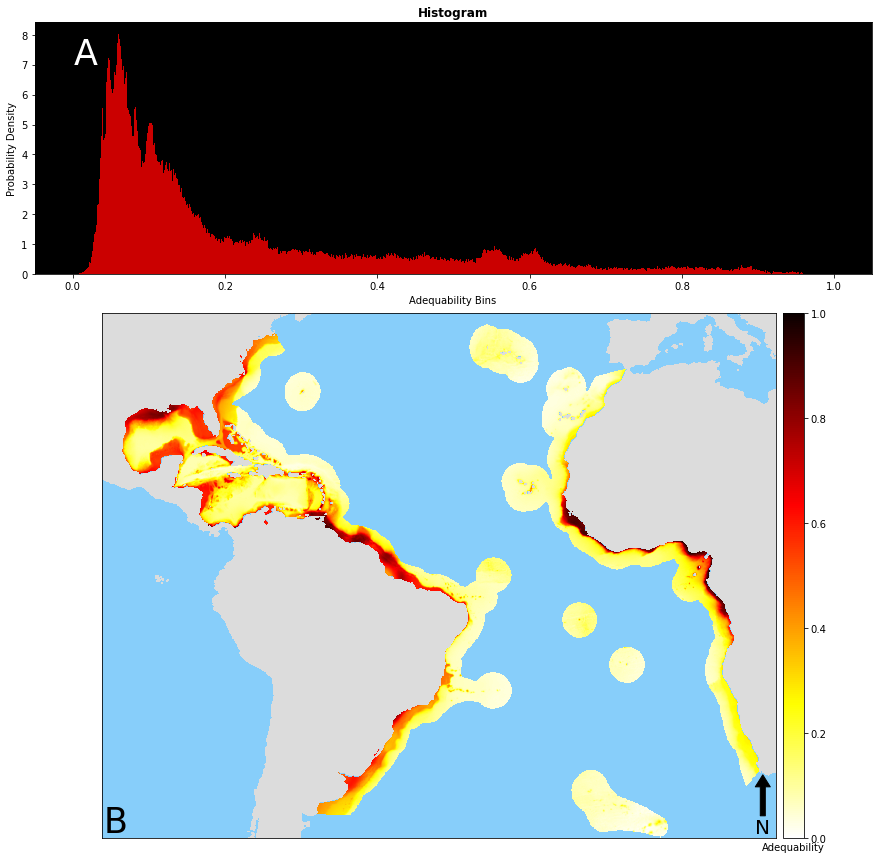

In [39]:
UdRd_Ensemble=rasterio.open('D:\Pesquisa\Mestrado\PRIMEIRO_CAPITULO_DIFERENCIADO\Modelos_de_Nicho\Teste_Independente_America\PELOTSS\ensemble_sdm_africa_IndepAmerica_PELOTSS.img')

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,15),
                       gridspec_kw={
                           'width_ratios': [12],
                           'height_ratios': [12,25],'hspace': 0.1})
aspect = 20
pad_fraction = 0.5

xlim = ([Ecoreg.total_bounds[0],  Ecoreg.total_bounds[2]])
ylim = ([Ecoreg.total_bounds[1],  Ecoreg.total_bounds[3]])
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
paises2.plot(ax = ax[1],color = 'gainsboro',antialiased=False,edgecolor = 'none')

# use imshow so that we have something to map the colorbar to
image_hidden = ax[1].imshow(UdRd_Ensemble.read(1,masked = True), 
                         cmap='hot_r', 
                         vmin=0.0, 
                         vmax=1)

# plot on the same axis with rio.plot.show
image = show(UdRd_Ensemble, 
                      transform=UdRd_Ensemble.transform, 
                      ax=ax[1], 
                      cmap='hot_r', 
                      vmin=0.0, 
                      vmax=1)

# add colorbar using the now hidden image

divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="3%", pad=0.10)
cax.set_xlabel('Adequability')
plt.colorbar(image_hidden, cax=cax)
ax[1].set_facecolor('lightskyblue')
ax[1].tick_params(axis = 'both',which='both',labelbottom = False,bottom=False,labelleft = False,left=False)
x, y, arrow_length = 0.98, 0.12, 0.1
ax[1].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax[1].transAxes)

#AX0
show_hist(UdRd_Ensemble,ax=ax[0], bins=np.arange(0.0,1,0.001), stacked=False, alpha=0.8,log=False,cumulative= False,density= True)
ax[0].get_legend().remove()
ax[0].grid(False)
ax[0].set_facecolor('black')
ax[0].set( ylabel='Probability Density',xlabel = 'Adequability Bins')



ax[0].text(0.001, 7.0,'A', fontsize = 35,color = 'white')
w, z, letra = 0.02, 0.13, 0.1
ax[1].annotate('B', xy=(w, z), xytext=(w, z-letra),
            
            ha='center', va='center', fontsize=35,
            xycoords=ax[1].transAxes)

plt.show()